
# DSC 640 - Project - Dashboard

## Is air travels the safest way to travel?

This dashboard will show charts and figures about the trends of airline safety. In this first phase of the visualization project, I will show the real facts related to commercial air accidents. We will take a tour through the years, from 1913 to 2009. I will show the trends of aircraft that have had the most accidents and the places where they have occurred. My idea is to show data without bias in order for the airlines to show the favorable side of the story.

### By Mario Aldana



### Platform version,

`Python 3.7.4`

`Anaconda Navigator 1.9.7`

`Jupyter Notebook 5.5.0`


In [2]:
# Python visual libraries,

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Dataset: Airplane Crashes and Fatalities Since 1908 (Full history of airplane crashes throughout the world, from 1908-2009) from kagge.com


In [4]:
df = pd.read_csv('C:/Z-Contenedor/DSC640/Project/Airplane_Crashes_and_Fatalities_Since_1908.csv')
print('Count of observations {0}'.format(len(df)))
print('Count of variables {0}'.format(len(df.columns)))

Count of observations 5268
Count of variables 13


### Prepare the dataset:

In [5]:
df['Operator'] = df['Operator'].fillna('No Operator')
df.drop(df[df['Aboard'].isna()].index, inplace = True)
df['Ground'] = df['Ground'].fillna(0)
df['Type'] = df['Type'].fillna('No Type')

print('Nulls:')
100 * df.isnull().sum()/len(df)

Nulls:


Date             0.000000
Time            41.879527
Location         0.362181
Operator         0.000000
Flight #        79.660694
Route           32.195959
Type             0.000000
Registration     6.328631
cn/In           23.198628
Aboard           0.000000
Fatalities       0.000000
Ground           0.000000
Summary          7.300801
dtype: float64

### In this analysis, military accidents will not be taken into account,

In [6]:
df['Operator'] = df['Operator'].str.lower()
df.drop(df[df['Operator'].str.match('military')].index, inplace = True)

### For the purpose of comparing different periods of air accidents, we will split date column into day, month, and year,


In [7]:
df['Date']= pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

### Get the places where accidents have occurred,

In [ ]:
df['Location'] = df['Location'].str.strip().str.lower().str.replace(',', ' ')
df['places'] = df['Location'].str.split().str[-1]

### Final dataset,

In [8]:
df = df.reset_index(drop=True)
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,day,month,year
0,1913-08-06,NaN,"Victoria, British Columbia, Canada",private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,6,8,1913
1,1918-12-16,NaN,"Elizabeth, New Jersey",us aerial mail service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,16,12,1918
2,1919-05-25,NaN,"Cleveland, Ohio",us aerial mail service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,25,5,1919
3,1919-07-19,NaN,"Dix Run, Pennsylvania",us aerial mail service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN,19,7,1919
4,1919-10-02,NaN,"Newcastle, England",aircraft transport and travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN,2,10,1919


### Statistical Summary:

In [9]:
df.describe()

,Aboard,Fatalities,Ground,day,month,year
count,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000,4484.000000
mean,27.613069,19.268733,1.648528,15.717217,6.676851,1971.538582
std,45.263522,34.518256,58.319457,8.823187,3.568230,22.422804
min,1.000000,0.000000,0.000000,1.000000,1.000000,1913.000000
25%,4.000000,3.000000,0.000000,8.000000,3.000000,1955.000000
50%,11.000000,7.000000,0.000000,16.000000,7.000000,1973.000000
75%,30.000000,20.000000,0.000000,23.000000,10.000000,1990.000000
max,644.000000,583.000000,2750.000000,31.000000,12.000000,2009.000000


## This bar chart show the number of passengers who were involved in air accidents from 1913 to 2009:

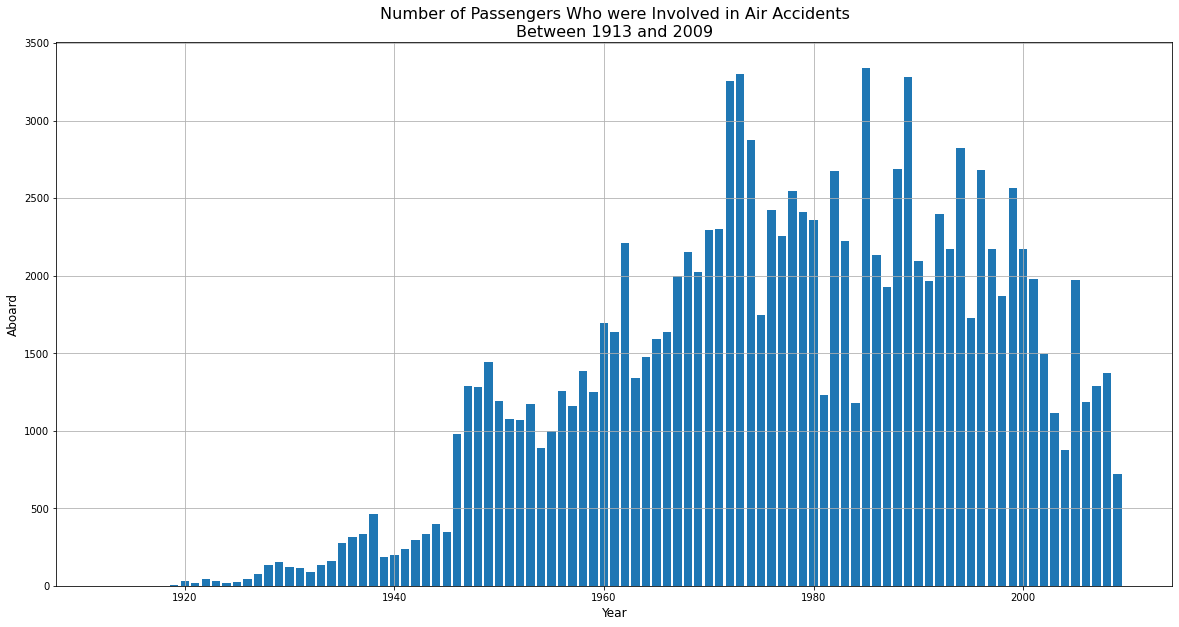

In [131]:
df2 = df.groupby('year')['Aboard', 'Fatalities'].sum().reset_index()

plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(df2['year'], df2['Aboard'])
plt.title("Number of Passengers Who were Involved in Air Accidents\n" + "Between 1913 and 2009", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Aboard', fontsize=12)
plt.grid(True)
plt.show()

## This bar chart shows the number of fatalities in air accidents from 1920 to 2009:

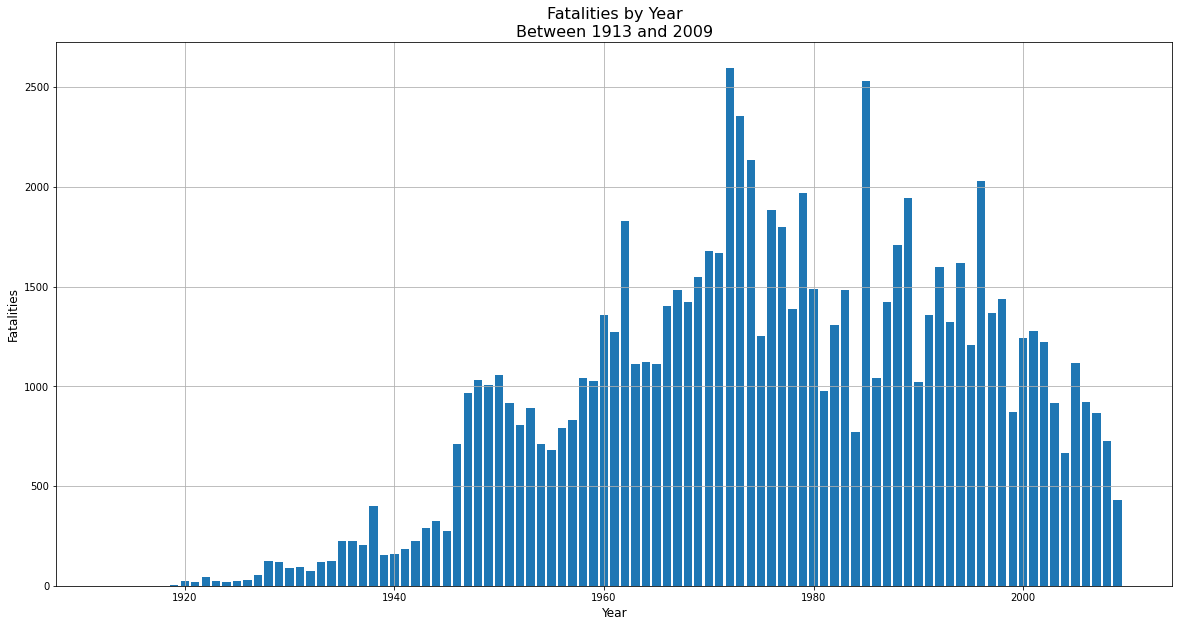

In [130]:
plt.bar(df2['year'], df2['Fatalities'])
plt.title("Fatalities by Year\n" + "Between 1913 and 2009", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatalities', fontsize=12)
plt.grid(True)
plt.show()

## This Stacked bar chart shows the number of passengers aboard with fatalities by year:

<AxesSubplot:title={'center':'Aboard and Fatalities by Year\nBetween 1913 and 2009'}, xlabel='Year', ylabel='Aboard and Fatalities'>

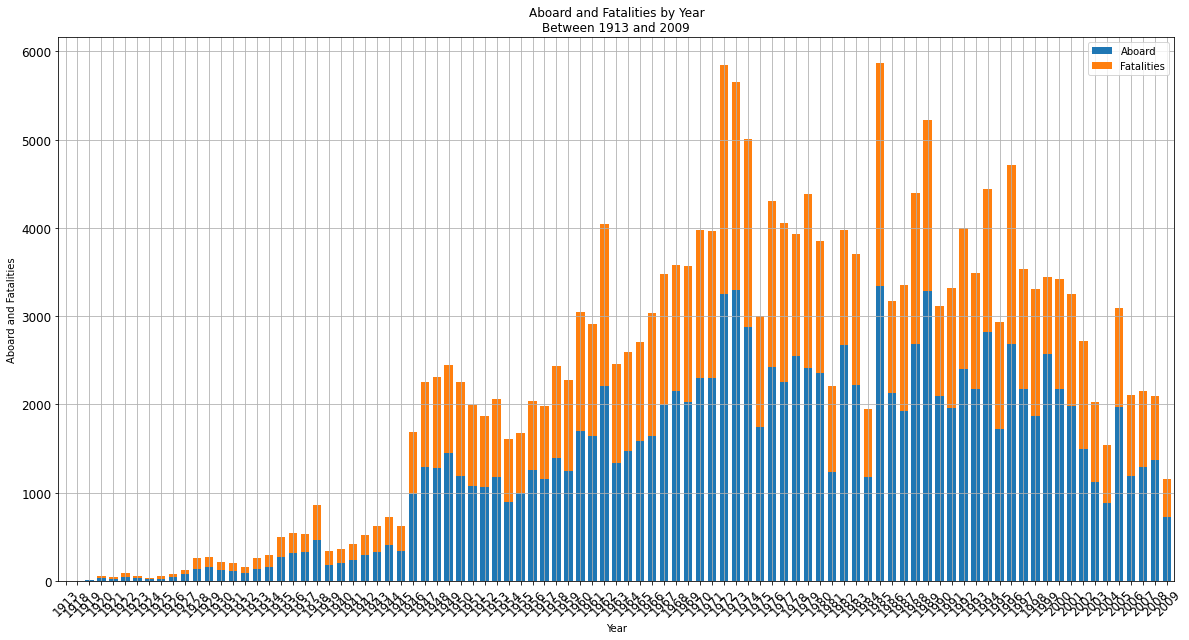

In [129]:
fig, ax = plt.subplots()
df2.plot.bar(x = 'year', 
             y = ['Aboard', 'Fatalities'], 
             rot = 45, 
             ax = ax, 
             width = 0.7,
             title = "Aboard and Fatalities by Year\n" + "Between 1913 and 2009",
             grid = True,
             fontsize = 12,
             xlabel = 'Year',
             ylabel = 'Aboard and Fatalities',
             stacked = True)

## This Stacked bar chart shows the number of passengers aboard and Fatalities (>19) by type airplane between 2005 and 2009:

In [126]:
lastcraches = df[(df["year"] > 2004) & (df["Fatalities"] > 19)]
df3 = lastcraches.groupby('Type')['Aboard', 'Fatalities'].sum().reset_index()

<AxesSubplot:title={'center':'Aboard and Fatalities by Type Airplane\nBetween 2005 and 2009 & Fatalities greater than 20'}, xlabel='Type Airplane', ylabel='Aboard and Fatalities'>

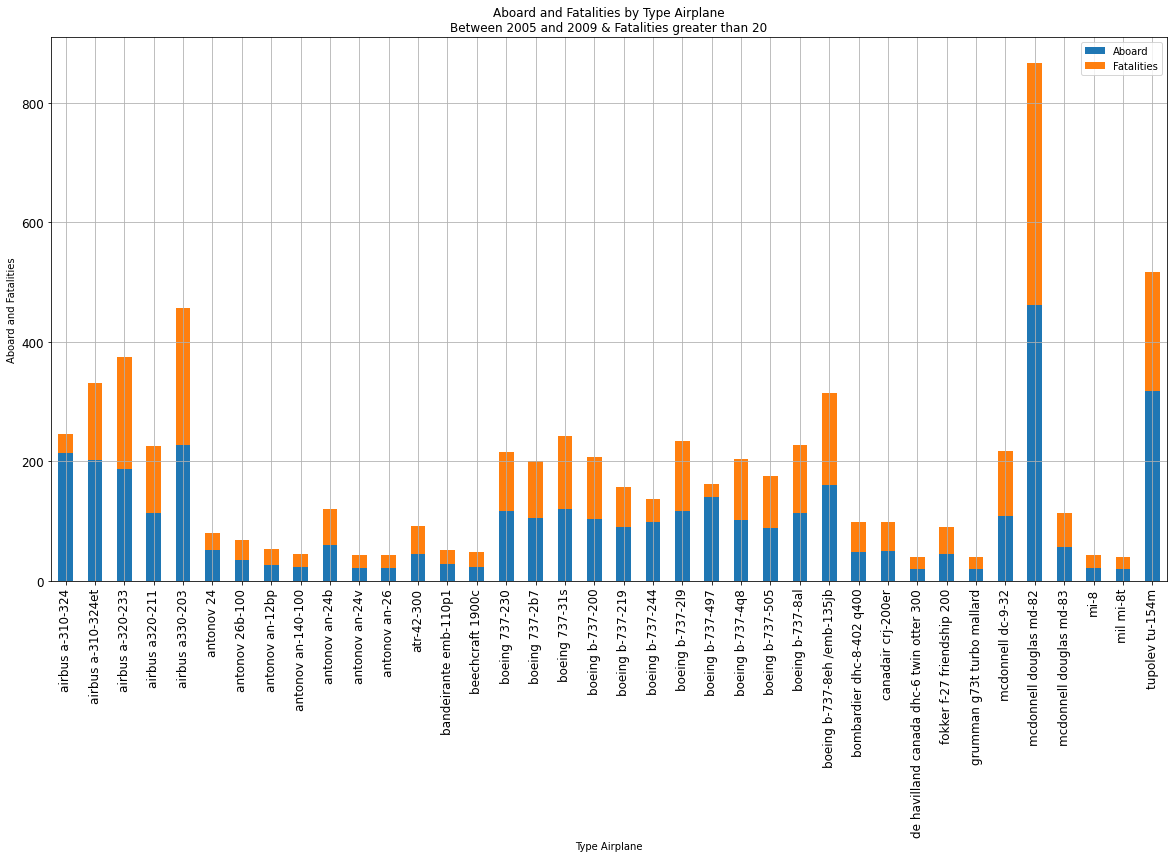

In [128]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
df3.plot.bar(x = 'Type', 
             y = ['Aboard', 'Fatalities'], 
             rot = 90, 
             ax = ax, 
             width = 0.5, 
             title = "Aboard and Fatalities by Type Airplane\n" + "Between 2005 and 2009 & Fatalities greater than 20",
             grid = True,
             fontsize = 12,
             xlabel = 'Type Airplane',
             ylabel = 'Aboard and Fatalities',
             stacked=True)

### McDonnell Douglas and Tupolev are the aircraft that have had the most fatalities. We are going to analyze them with Pie charts.

## This Pie chart shows the kinds of McDonnell Douglas aircraft that crashed:

In [124]:
df['Type'] = df['Type'].str.lower()
douglas = df[df['Type'].str.match('mcdonnell')]
df4 = douglas.groupby('Type')['day'].count().reset_index()
df4.columns = ['mcdonell Aircraft', 'Crashes']
df4 = df4[(df4['Crashes'] > 2)]

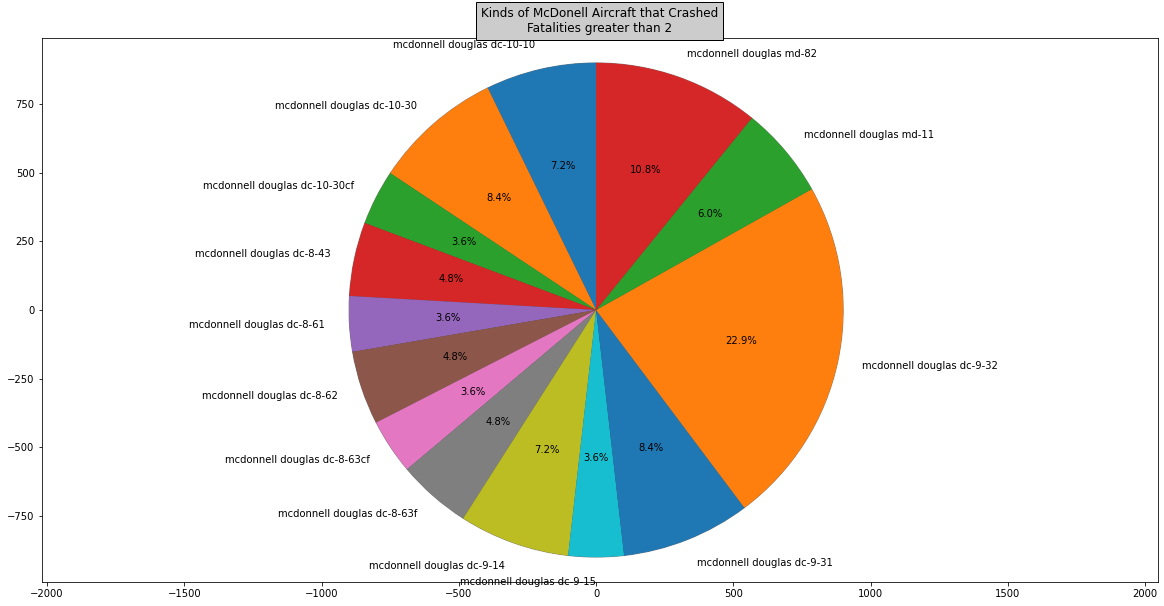

In [125]:
fig1, ax1 = plt.subplots()
ax1.pie(df4['Crashes'], 
        labels=df4['mcdonell Aircraft'], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        radius=900, 
        frame=True
       )

ax1.axis('equal')
plt.title("Kinds of McDonell Aircraft that Crashed\n" + "Fatalities greater than 2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## This Pie chart shows the kinds of Tupolev aircraft that crashed:

In [121]:
df['Type'] = df['Type'].str.lower()
tupolev = df[df['Type'].str.match('tupolev')]
df4 = tupolev.groupby('Type')['day'].count().reset_index()
df4.columns = ['Tupolev Aircraft', 'Crashes']
df4 = df4[(df4['Crashes'] > 2)]

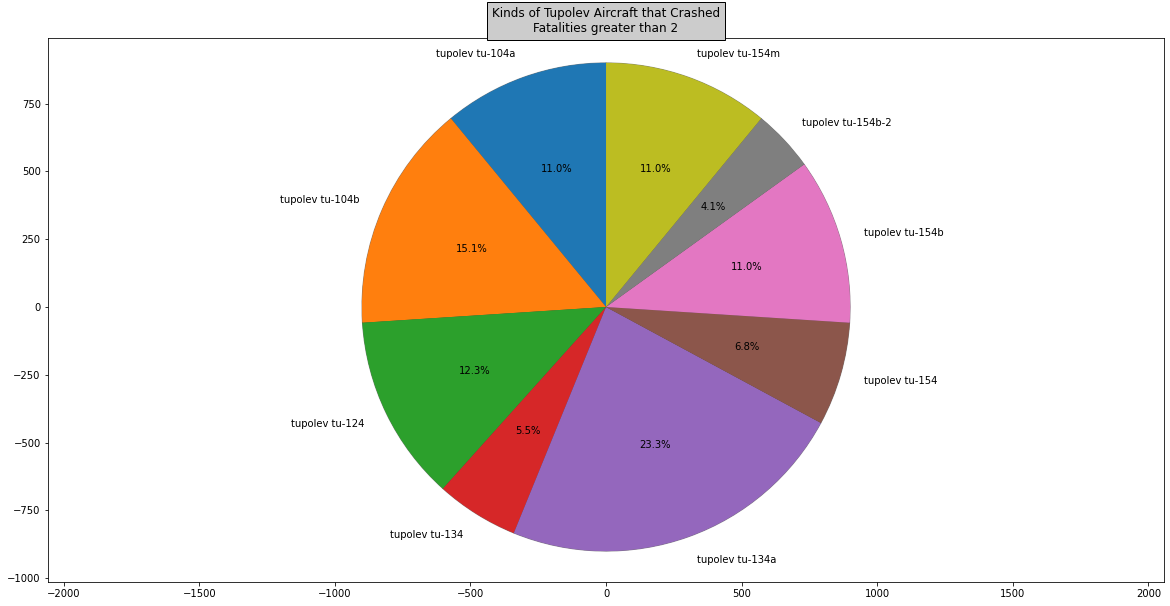

In [123]:
fig1, ax1 = plt.subplots()
ax1.pie(df4['Crashes'], 
        labels=df4['Tupolev Aircraft'],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        radius=900, 
        frame=True
       )

ax1.axis('equal')
plt.title("Kinds of Tupolev Aircraft that Crashed\n" + "Fatalities greater than 2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## In this Donut chart, we will look at the places with the most fatalities between 1999 and 2009 and with fatalities greater than 10:

In [99]:
df5 = df[(df["year"] > 2004)]
df5 = df5.groupby('places')['Fatalities'].sum().reset_index()
df5 = df5[(df5["Fatalities"] > 29)]

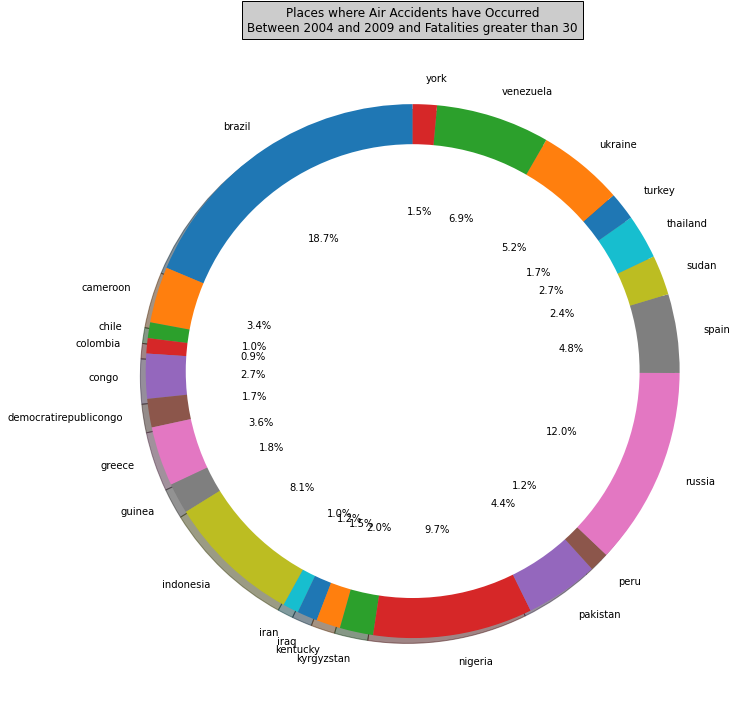

In [101]:
plt.pie(df5['Fatalities'], 
        labels=df5['places'], 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90
       )

circle = plt.Circle((0,0),0.85,fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)

ax1.axis('equal')
plt.title("Places where Air Accidents have Occurred\n" + "Between 2004 and 2009 and Fatalities greater than 30", bbox={'facecolor':'0.8', 'pad':5})
plt.tight_layout()


## This Line chart shows the trend of air accidents since the beginning of commercial aviation and until 2009:

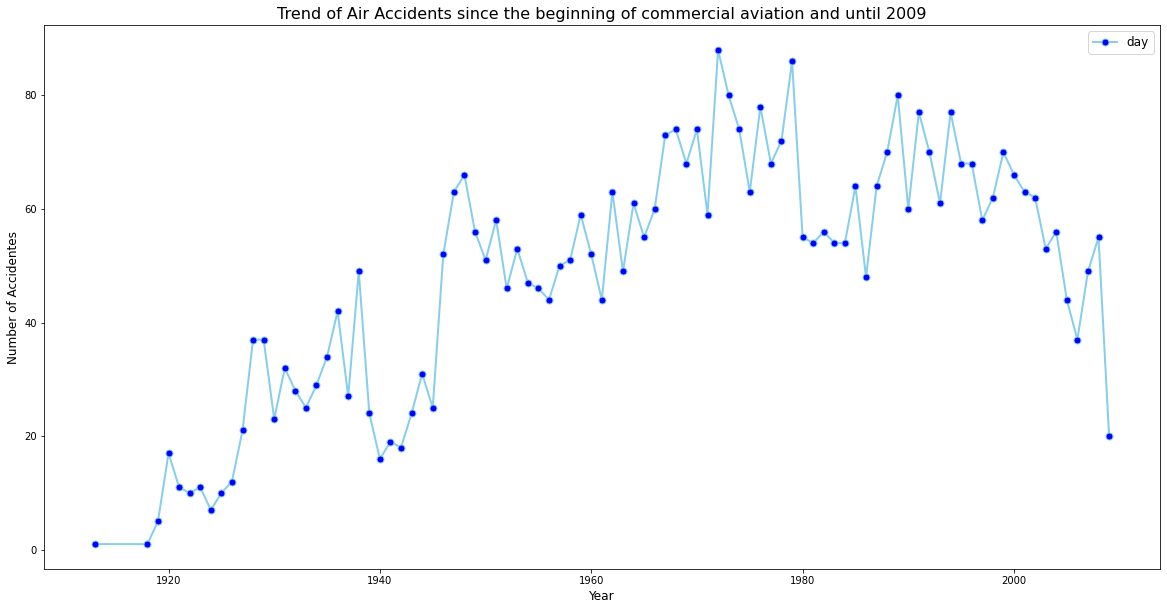

In [98]:
df6 = df.groupby('year')['day'].count().reset_index()
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot( 'year', 'day', data=df6, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.title('Trend of Air Accidents since the beginning of commercial aviation and until 2009', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidentes', fontsize=12)
plt.legend(fontsize=12)

## This Step chart shows the trend of air accidents since the beginning of commercial aviation and until 2009:

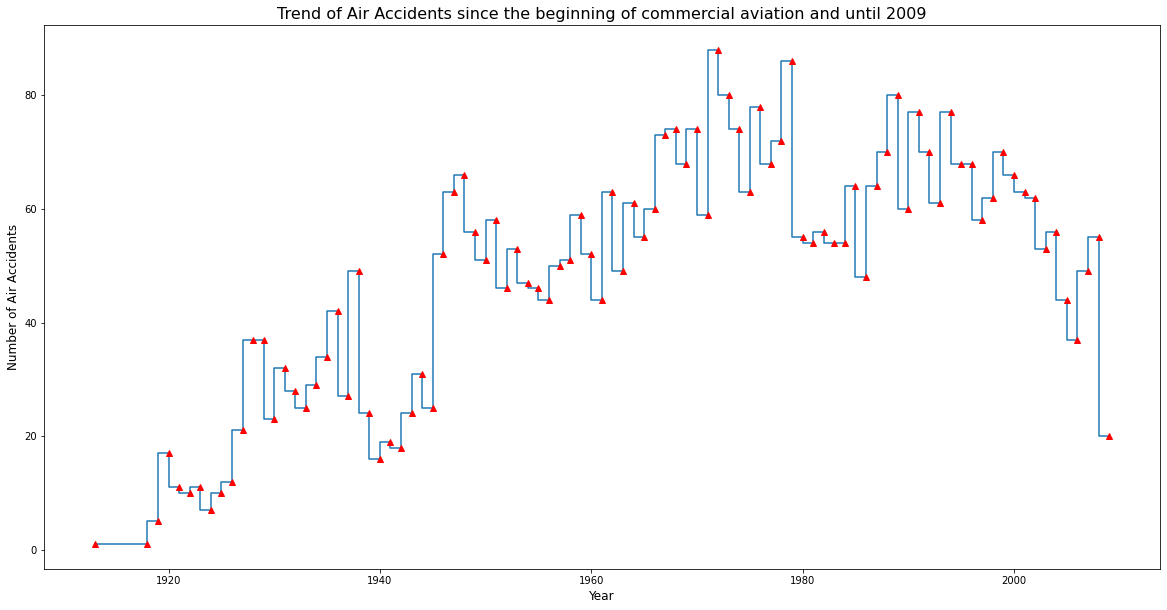

In [97]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.step(df6['year'], df6['day'])
plt.step(df6['year'], df6['day'], 'r^', where='pre')
plt.title('Trend of Air Accidents since the beginning of commercial aviation and until 2009', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Air Accidents', fontsize=12)
plt.show() 